<h1> Coursera Data Science Capstone Project on Car Accident Severity(Week 1)

<h2> This repository contains files produced for my IBM Coursera Advanced Data Science Capstone Project

In [1]:
# Imports and initial setup
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style


from sklearn import preprocessing


In [2]:
path="https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
df=pd.read_csv(path)

In [3]:
df.shape

(221006, 40)

In [4]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
# Removal of Non Relevant Features
data=df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES", "ADDRTYPE", "COLLISIONTYPE", "INCDATE", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "WEATHER", "ROADCOND", "LIGHTCOND"]]

In [6]:
display(data.shape)

(221006, 19)

In [7]:
data.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,ADDRTYPE,COLLISIONTYPE,INCDATE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,WEATHER,ROADCOND,LIGHTCOND
0,2,2,0,0,0,2,0,0,Intersection,NaN,2020/08/10 00:00:00+00,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
1,2,3,0,0,0,1,0,0,Block,NaN,2020/08/14 00:00:00+00,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
2,1,2,0,0,2,0,0,0,Intersection,Rear Ended,2013/04/02 00:00:00+00,NaN,N,NaN,NaN,N,Clear,Dry,Daylight
3,1,8,0,0,2,0,0,0,Block,Sideswipe,2013/03/30 00:00:00+00,NaN,N,NaN,NaN,N,Clear,Dry,Daylight
4,0,0,0,0,0,0,0,0,Intersection,NaN,2004/02/15 00:00:00+00,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [8]:
li=["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES"]
dTot=data[li].sum(axis=0)

In [9]:
data[li].loc

In [10]:
data["INCDATE"]=data["INCDATE"].str[:10]
data[["YEAR", "MONTH", "DAY"]]=data["INCDATE"].str.split("/", expand=True)
data.drop("INCDATE", axis=1, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [11]:
data.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,ADDRTYPE,COLLISIONTYPE,...,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,WEATHER,ROADCOND,LIGHTCOND,YEAR,MONTH,DAY
0,2,2,0,0,0,2,0,0,Intersection,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,2020,08,10
1,2,3,0,0,0,1,0,0,Block,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,2020,08,14
2,1,2,0,0,2,0,0,0,Intersection,Rear Ended,...,N,NaN,NaN,N,Clear,Dry,Daylight,2013,04,02
3,1,8,0,0,2,0,0,0,Block,Sideswipe,...,N,NaN,NaN,N,Clear,Dry,Daylight,2013,03,30
4,0,0,0,0,0,0,0,0,Intersection,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,2004,02,15


In [12]:
# Convert Date from str to int
data=data.astype({"UNDERINFL":str, "YEAR":int, "MONTH":int, "DAY":int})
data["UNDERINFL"].value_counts()

N      103393
0       81676
nan     26308
Y        5399
1        4230
Name: UNDERINFL, dtype: int64

<AxesSubplot:xlabel='YEAR'>

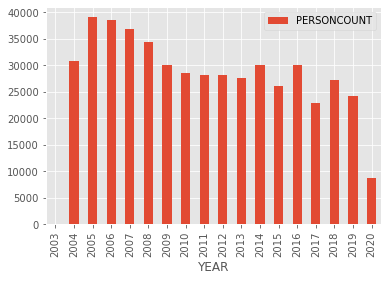

In [13]:
data[["YEAR", "PERSONCOUNT"]].groupby("YEAR").sum().plot(kind="bar")

<AxesSubplot:xlabel='MONTH'>

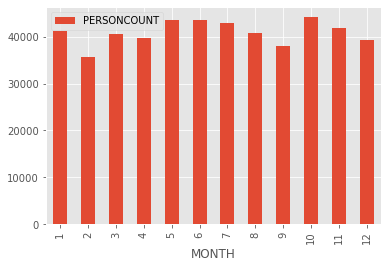

In [14]:
data[["MONTH", "PERSONCOUNT"]].groupby("MONTH").sum().plot(kind="bar")

<AxesSubplot:xlabel='DAY'>

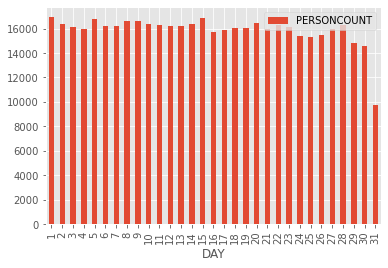

In [15]:
data[["DAY", "PERSONCOUNT"]].groupby("DAY").sum().plot(kind="bar")

In [16]:
data["PERSONCOUNT"].sum()

492111

In [17]:
data.groupby("SEVERITYCODE").sum()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,YEAR,MONTH,DAY
SEVERITYCODE,,,,,,,,,,
0,4117,0,0,0,0,0,0,43465531,144537,334434
1,319857,725,685,267247,0,0,0,276199688,897106,2144586
2,159121,6575,4886,109694,77939,0,0,117922275,385024,914413
2b,7973,978,433,4860,4396,3248,0,6218335,20199,48506
3,1041,150,28,502,288,103,372,701928,2421,5503


<AxesSubplot:xlabel='SEVERITYCODE'>

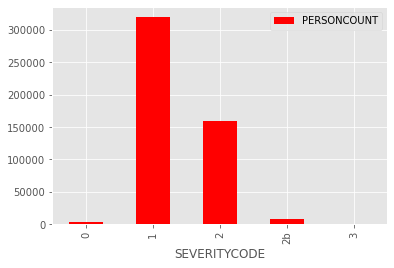

In [18]:
data[["SEVERITYCODE", "PERSONCOUNT"]].groupby("SEVERITYCODE").sum().plot(kind="bar", color="red")

<h2> Making predictions based on the features that aren't directly related with the collissions

In [19]:
data_new=df[["SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
data_new.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2,Block,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1,Intersection,Rear Ended,NaN,N,Clear,Dry,Daylight,NaN,NaN,N
3,1,Block,Sideswipe,NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,0,Intersection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


<h3> Relation with Address type

In [20]:
data_new["ADDRTYPE"].count()

217295

<AxesSubplot:xlabel='SEVERITYCODE'>

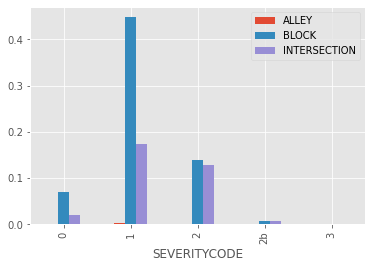

In [21]:
addrtype=pd.get_dummies(pd.DataFrame(data_new["ADDRTYPE"]))/data_new["ADDRTYPE"].count()

addrtype.columns =["ALLEY", "BLOCK", "INTERSECTION"]
addrtype
data_new=pd.concat([data_new, addrtype], axis=1)
data_new.drop("ADDRTYPE", axis=1, inplace=True)
data_new[["SEVERITYCODE", "ALLEY", "BLOCK", "INTERSECTION"]].groupby("SEVERITYCODE").sum().plot(kind="bar")


<h3> Relation with SPEEDING

In [22]:
data_new["SPEEDING"].value_counts()


Y    9900
Name: SPEEDING, dtype: int64

<AxesSubplot:xlabel='SEVERITYCODE'>

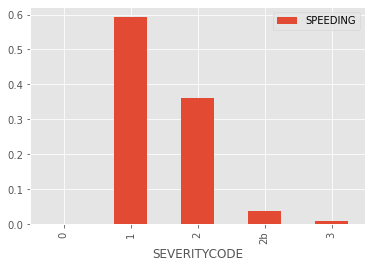

In [23]:
(data_new[["SEVERITYCODE", "SPEEDING"]].groupby("SEVERITYCODE").count()/data_new["SPEEDING"].count()).plot(kind="bar")

<h3> Relation with Under Influence

In [24]:
data_new["UNDERINFL"].value_counts()

N    103393
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [25]:
data_new["UNDERINFL"]=data_new["UNDERINFL"].replace(["1","0"], ["Y","N"])
data_new["UNDERINFL"].value_counts()


N    185069
Y      9629
Name: UNDERINFL, dtype: int64

In [26]:
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["UNDERINFL"])/data_new["UNDERINFL"].count()
dgg=pd.concat([dtt,dff], axis=1)

<AxesSubplot:xlabel='SEVERITYCODE'>

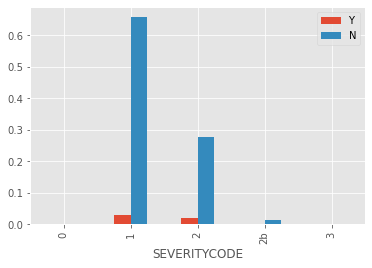

In [27]:
dgg[["SEVERITYCODE", "Y", "N"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

<h3> Relation with INATTENTIONIND

In [28]:
data_new["INATTENTIONIND"].value_counts()


Y    30188
Name: INATTENTIONIND, dtype: int64

<AxesSubplot:xlabel='SEVERITYCODE'>

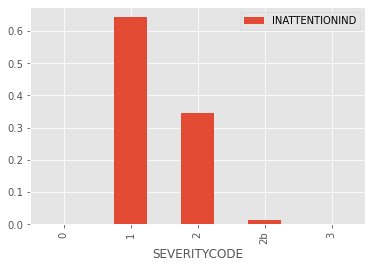

In [29]:
(data_new[["SEVERITYCODE", "INATTENTIONIND"]].groupby("SEVERITYCODE").count()/data_new["INATTENTIONIND"].count()).plot(kind="bar")

<h3> Relation with PEDROWNOTGRNT

In [30]:
data_new["PEDROWNOTGRNT"].value_counts()

Y    5187
Name: PEDROWNOTGRNT, dtype: int64

<AxesSubplot:xlabel='SEVERITYCODE'>

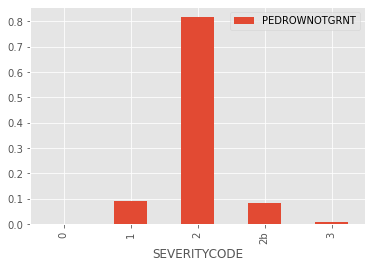

In [31]:
(data_new[["SEVERITYCODE", "PEDROWNOTGRNT"]].groupby("SEVERITYCODE").count()/data_new["PEDROWNOTGRNT"].count()).plot(kind="bar")

<h3> Relation with HITPARKEDCAR

In [32]:
data_new["HITPARKEDCAR"].value_counts()

N    209085
Y     11921
Name: HITPARKEDCAR, dtype: int64

In [33]:
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["HITPARKEDCAR"])/data_new["HITPARKEDCAR"].count()
dgg=pd.concat([dtt,dff], axis=1)

<AxesSubplot:xlabel='SEVERITYCODE'>

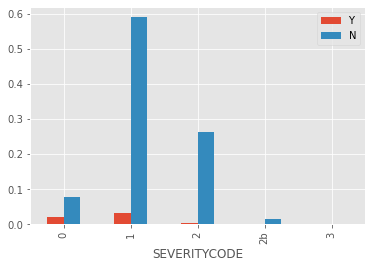

In [34]:
dgg[["SEVERITYCODE", "Y", "N"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

<h3> Relation with COLLISIONTYPE

In [35]:
data_new["COLLISIONTYPE"].value_counts()

Parked Car    48446
Angles        35444
Rear Ended    34609
Other         24512
Sideswipe     18849
Left Turn     14075
Pedestrian     7652
Cycles         5905
Right Turn     3006
Head On        2180
Name: COLLISIONTYPE, dtype: int64

In [36]:
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["COLLISIONTYPE"])/data_new["COLLISIONTYPE"].count()
dgg=pd.concat([dtt,dff], axis=1)

<AxesSubplot:xlabel='SEVERITYCODE'>

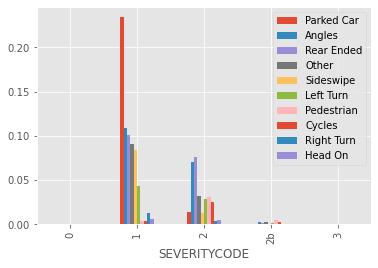

In [37]:
dgg[["SEVERITYCODE", "Parked Car", "Angles", "Rear Ended", "Other", "Sideswipe", "Left Turn", "Pedestrian", "Cycles", "Right Turn", "Head On"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

<h3> Relation with PEDCOUNT and PEDCYLCOUNT

<AxesSubplot:xlabel='SEVERITYCODE'>

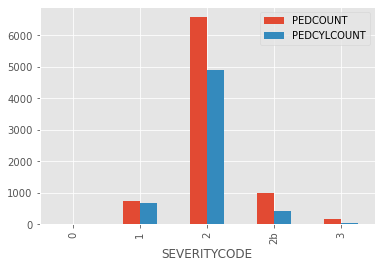

In [38]:
data[["SEVERITYCODE", "PEDCOUNT", "PEDCYLCOUNT"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

<h3> Relation with Environment

<AxesSubplot:xlabel='SEVERITYCODE'>

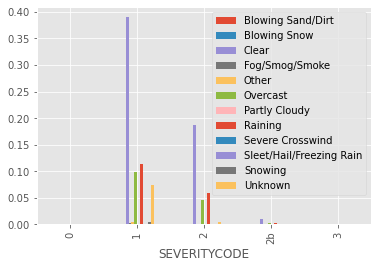

In [39]:
data["WEATHER"].value_counts()
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["WEATHER"])/data_new["WEATHER"].count()
dgg=pd.concat([dtt,dff], axis=1)
dgg[:].groupby("SEVERITYCODE").sum().plot(kind="bar")

<AxesSubplot:xlabel='SEVERITYCODE'>

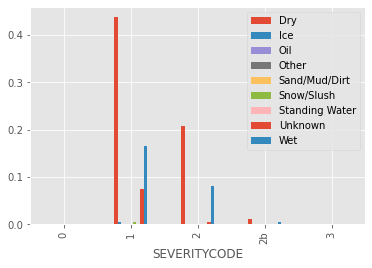

In [40]:
data["ROADCOND"].value_counts()
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["ROADCOND"])/data_new["ROADCOND"].count()
dgg=pd.concat([dtt,dff], axis=1)
dgg[:].groupby("SEVERITYCODE").sum().plot(kind="bar")

<AxesSubplot:xlabel='SEVERITYCODE'>

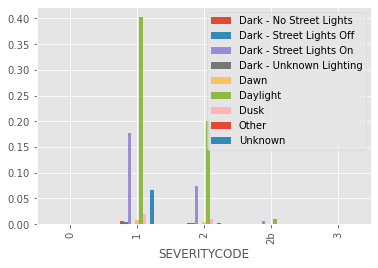

In [41]:
data["LIGHTCOND"].value_counts()
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["LIGHTCOND"])/data_new["LIGHTCOND"].count()
dgg=pd.concat([dtt,dff], axis=1)
dgg[:].groupby("SEVERITYCODE").sum().plot(kind="bar")

<h2> THE FINAL DATA SETS

In [42]:
data=df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "ADDRTYPE", "COLLISIONTYPE", "INCDATE", "WEATHER", "ROADCOND", "LIGHTCOND"]]
#Split the Date
data["INCDATE"]=data["INCDATE"].str[:10]
data[["YEAR", "MONTH", "DAY"]]=data["INCDATE"].str.split("/", expand=True)
data.drop("INCDATE", axis=1, inplace=True)

#Replace N and Y for 0 and 1 UNDERINFL
data["UNDERINFL"]=data["UNDERINFL"].replace(["Y","N","1","0"], [1,0,1,0])
data["HITPARKEDCAR"]=data["HITPARKEDCAR"].replace(["Y","N"], [1,0])
data["SPEEDING"]=data["SPEEDING"].replace(["Y","N"], [1,0])
data["INATTENTIONIND"]=data["INATTENTIONIND"].replace(["Y","N"], [1,0])
data["PEDROWNOTGRNT"]=data["PEDROWNOTGRNT"].replace(["Y","N"], [1,0])

data.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be se

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,...,SPEEDING,HITPARKEDCAR,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,YEAR,MONTH,DAY
0,2,2,0,0,0,2,0,0,NaN,NaN,...,NaN,0,Intersection,NaN,NaN,NaN,NaN,2020,08,10
1,2,3,0,0,0,1,0,0,NaN,NaN,...,NaN,0,Block,NaN,NaN,NaN,NaN,2020,08,14
2,1,2,0,0,2,0,0,0,NaN,0.0,...,NaN,0,Intersection,Rear Ended,Clear,Dry,Daylight,2013,04,02
3,1,8,0,0,2,0,0,0,NaN,0.0,...,NaN,0,Block,Sideswipe,Clear,Dry,Daylight,2013,03,30
4,0,0,0,0,0,0,0,0,NaN,NaN,...,NaN,0,Intersection,NaN,NaN,NaN,NaN,2004,02,15


In [43]:
data_num=data[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "YEAR", "MONTH", "DAY"]]
data_env=data[["SEVERITYCODE","ADDRTYPE", "COLLISIONTYPE", "WEATHER", "ROADCOND", "LIGHTCOND"]]
data_easy=data[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES"]]

In [44]:
data_num.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,YEAR,MONTH,DAY
0,2,2,0,0,0,2,0,0,NaN,NaN,NaN,NaN,0,2020,08,10
1,2,3,0,0,0,1,0,0,NaN,NaN,NaN,NaN,0,2020,08,14
2,1,2,0,0,2,0,0,0,NaN,0.0,NaN,NaN,0,2013,04,02
3,1,8,0,0,2,0,0,0,NaN,0.0,NaN,NaN,0,2013,03,30
4,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,2004,02,15
